In [ ]:
# Necessary imports for preprocessing and machine learning
# Necessary imports for preprocessing and machine learning
!pip install statsmodels
!pip install plotly
!pip install bioinfokit
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer # interpolation for missing values
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
from bioinfokit.analys import stat
from bioinfokit import visuz


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the data set:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and targets into one DataFrame
heart_disease_df = pd.concat([X, y], axis=1)

# Export to CSV
heart_disease_df.to_csv('heart_disease_dataset.csv', index=False)

print("Dataset successfully saved as 'heart_disease_dataset.csv'.")

Dataset successfully saved as 'heart_disease_dataset.csv'.


In [ ]:
ls

drive/  finalized_data.csv  heart_disease_dataset.csv  sample_data/


In [ ]:
df=pd.read_csv('heart_disease_dataset.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.drop(columns=['cp', 'restecg', 'oldpeak','slope','thal'], inplace=True)

In [ ]:
df.to_csv('finalized_data.csv', index=False)

In [ ]:
ls

drive/  finalized_data.csv  heart_disease_dataset.csv  sample_data/


In [ ]:
df1=pd.read_csv('finalized_data.csv')
#df1.to_csv('finalized_data.csv', index=False)
#file_path='Desktop/PythonClass/Assignments/finalized_data.csv'
#df1.to_csv(file_path, index=False)
df1.to_csv('/content/drive/MyDrive/finalized_data.csv', index=False)

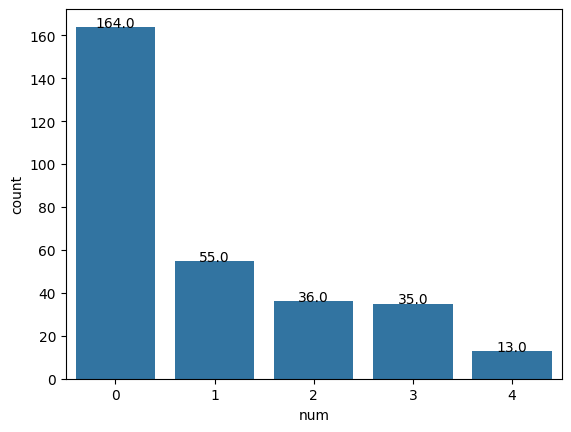

In [ ]:
# Is the dataset balanced?
ax = sns.countplot(data=df1, x='num')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

In [ ]:
# Handle the missing data

columns_list=df1.columns.tolist()
columns_list

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca', 'num']

In [ ]:
#List of categorical variables (dtype == object or category)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# List of numerical variables (dtype == int or float)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Display the lists
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: []
Numerical columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca', 'num']


In [ ]:
## check null values in the numerical column

df1.isnull().sum()

# handle missing value in ca category
df1['ca'].fillna(df1['ca'].mean(), inplace=True)

# confirm whether the value are there or not

df1.isnull().sum()

<ipython-input-520-0782611610b3>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
age,0
sex,0
trestbps,0
chol,0
fbs,0
thalach,0
exang,0
ca,0
num,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



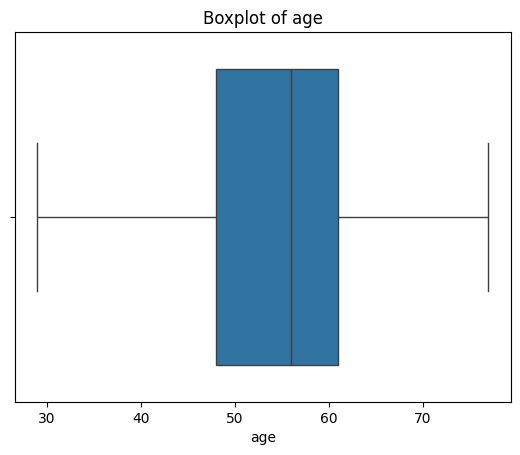

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



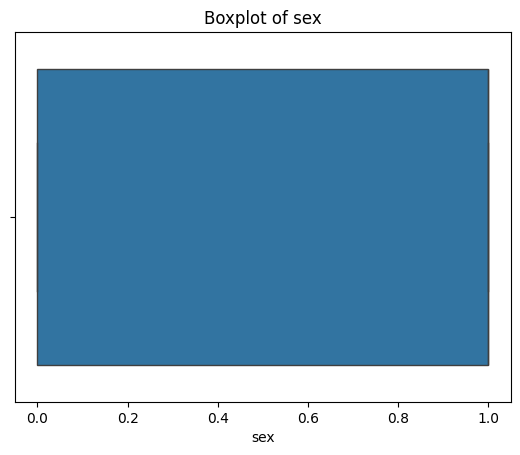

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



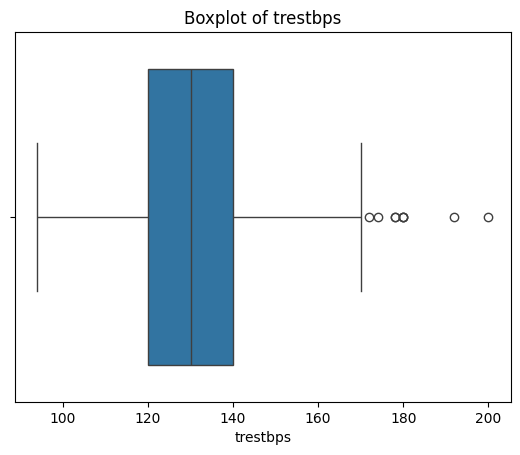

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



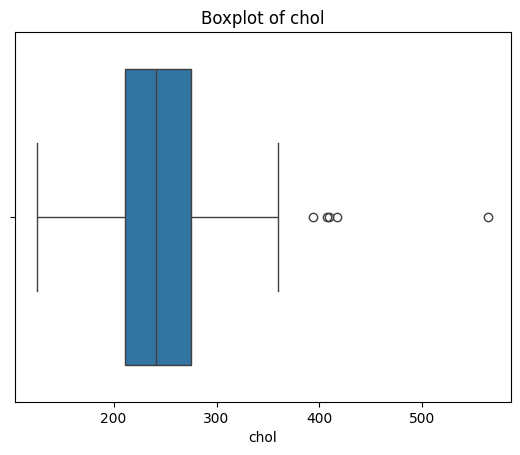

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



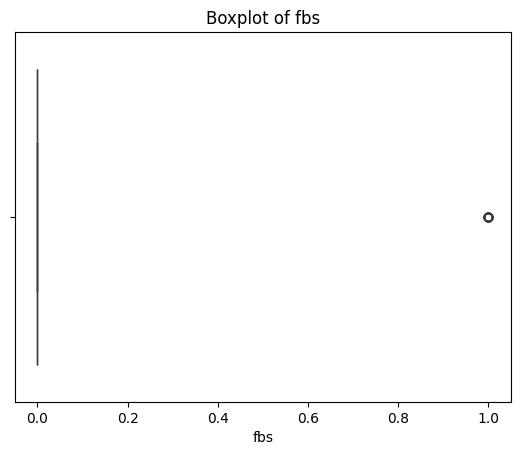

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



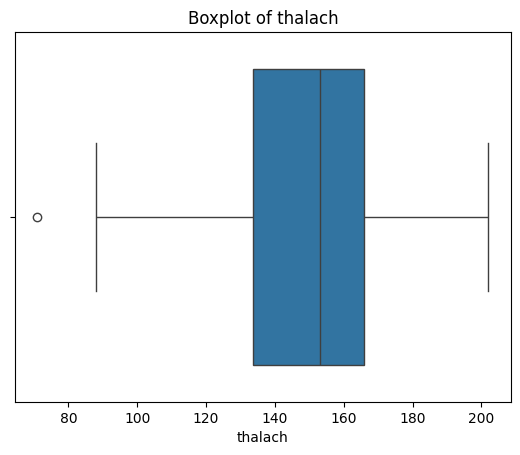

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



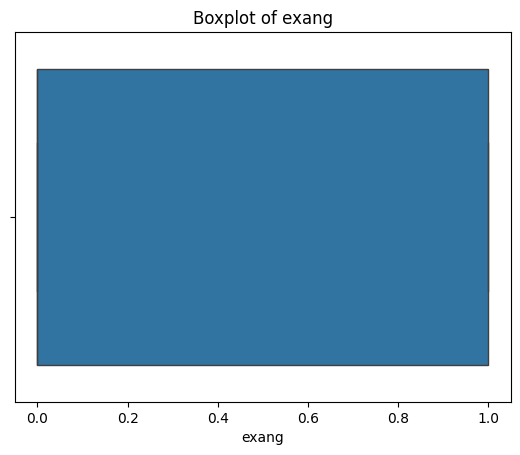

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



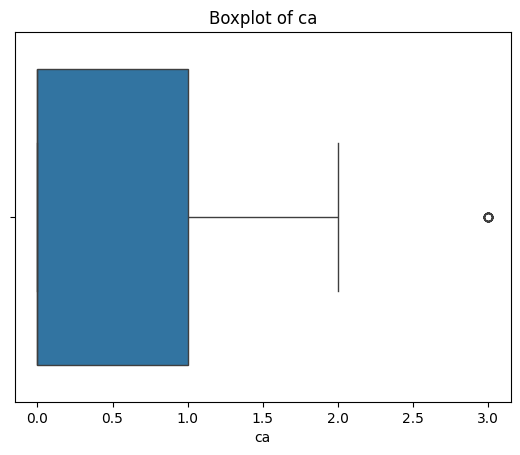

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



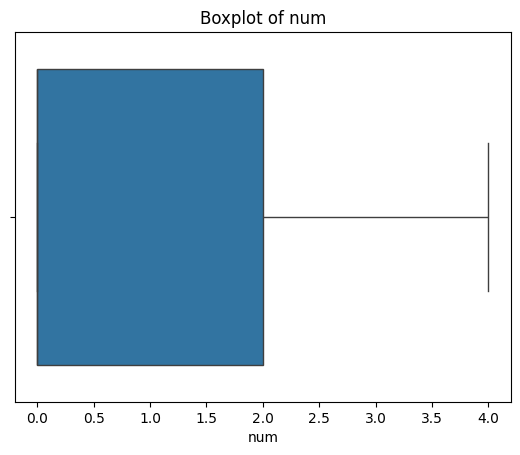

In [ ]:
# Find and remove outliers from teh dataset

for cols in numerical_cols:
  plt.figure()
  sns.boxplot(data=df1, x=cols)
  plt.title(f'Boxplot of {cols}')
  plt.show()

     age  sex  trestbps  chol  fbs  thalach  exang        ca  num
2     67    1       120   229    0      129      1  2.000000    1
3     37    1       130   250    0      187      0  0.000000    0
4     41    0       130   204    0      172      0  0.000000    0
5     56    1       120   236    0      178      0  0.000000    0
7     57    0       120   354    0      163      1  0.000000    0
..   ...  ...       ...   ...  ...      ...    ...       ...  ...
295   41    1       120   157    0      182      0  0.000000    0
297   57    0       140   241    0      123      1  0.000000    1
298   45    1       110   264    0      132      0  0.000000    1
301   57    0       130   236    0      174      0  1.000000    1
302   38    1       138   175    0      173      0  0.672241    0

[199 rows x 9 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



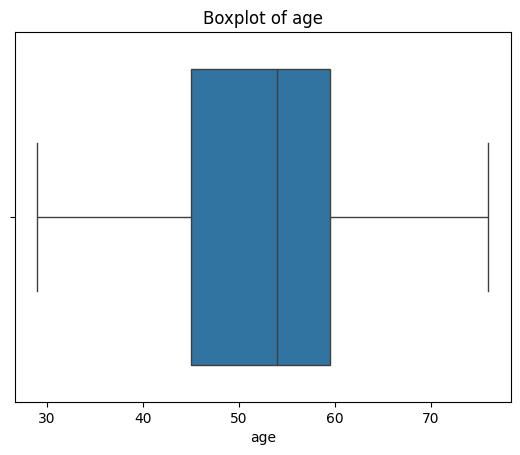

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



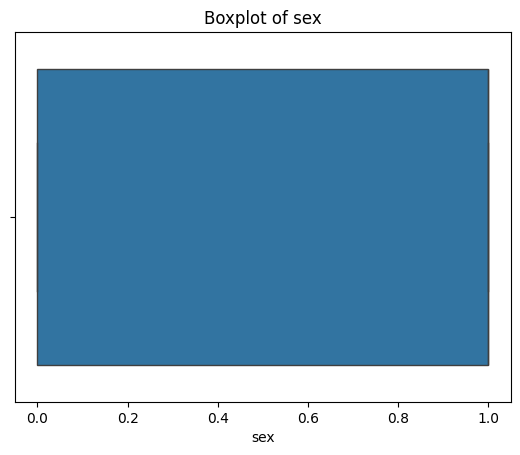

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



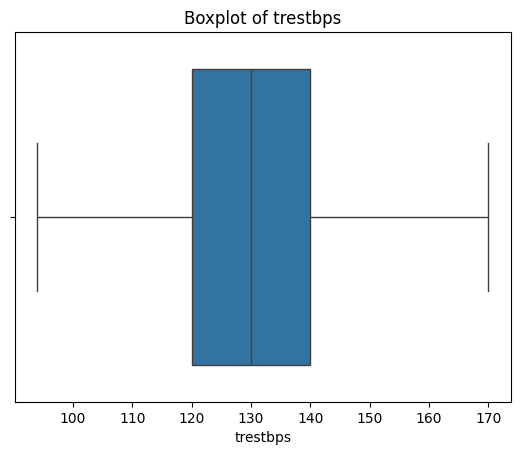

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



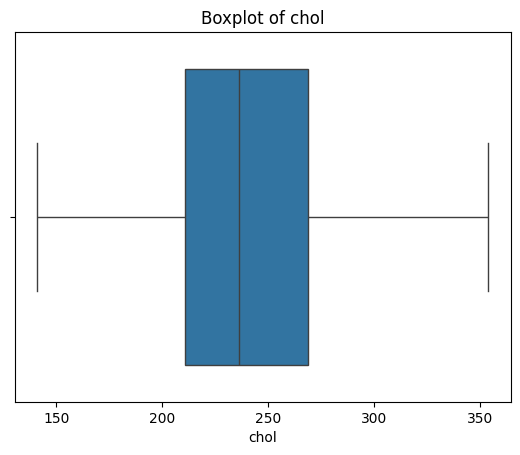

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



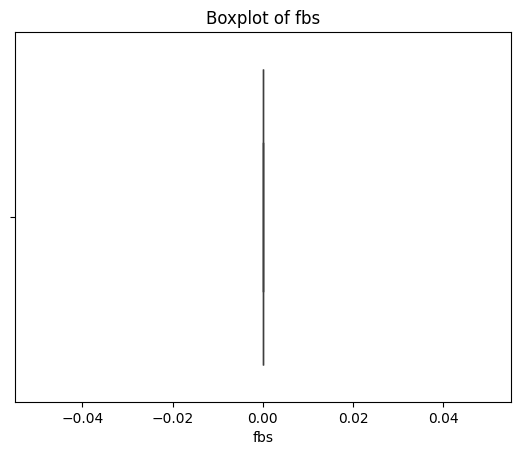

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



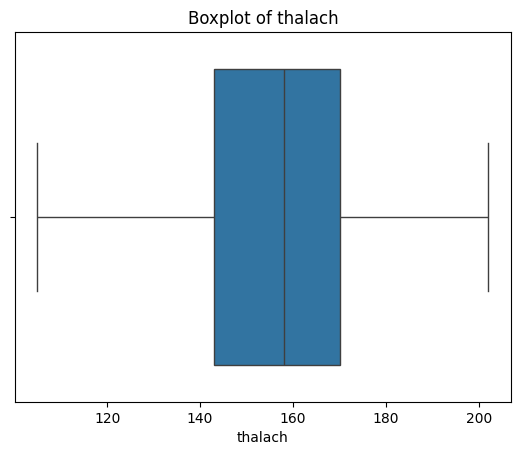

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



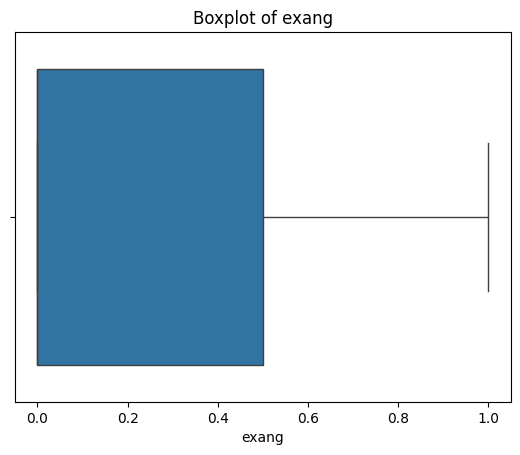

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



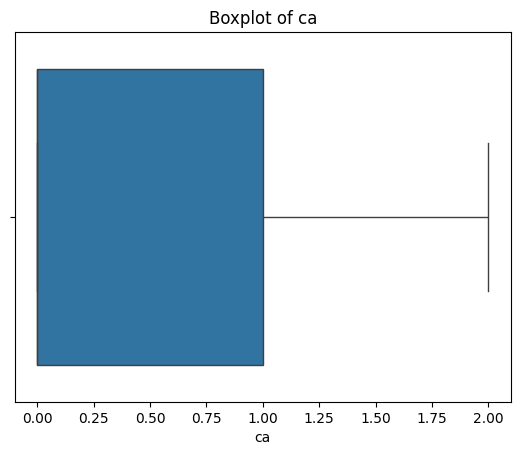

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



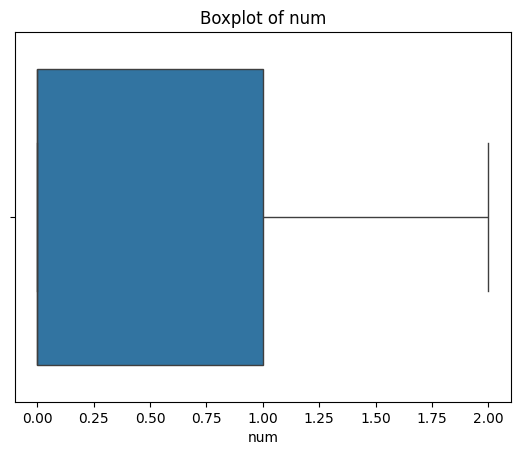

In [ ]:
# remove outlier from the data frame using IQR method
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

# dataframe after removing outliers

for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]

print(df1)

# check outlier using box plot again
for cols in numerical_cols:
  plt.figure()
  sns.boxplot(data=df1, x=cols)
  plt.title(f'Boxplot of {cols}')
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
df1_standardized = scaler.fit_transform(df1[numerical_cols])

# Create a new DataFrame with the standardized values
df1_standardized = pd.DataFrame(df1_standardized, columns=numerical_cols)

In [ ]:
# define the feature

X=df1_standardized.drop(columns=['num'])
y=df1_standardized['num']

# resample using smote
y = y.astype(int)

smote = SMOTE()
X_res, y_res = smote.fit_resample(X,y)

In [ ]:
# split inot tranining and testing data

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=8)

# Naive Byes model

nb_model=GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb=nb_model.predict(X_test)

In [ ]:
# Decison Tree

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)

In [ ]:
# Random Forest model

rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [ ]:
# KNN model

knn_moder=KNeighborsClassifier()
knn_moder.fit(X_train, y_train)
y_pred_kn=knn_moder.predict(X_test)

In [ ]:
# Evaluation: Confusion Matrix and Metrics

def evaluate_model(y_test, y_pred, model_name):
  print(f"\nModel: {model_name}")
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2f}")
 # print(f"Precision: {precision_score(y_test, y_pred):.2f}")
  print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
  print(f"PRecall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
  #print(f"PRecall: {recall_score(y_test, y_pred):.2f}")
  print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}\n")

#Evaluate all models
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_kn, "KNN")


Model: Naive Bayes
Confusion Matrix:
[[53  7]
 [ 0 48]]

Accuracy: 0.94
Precision: 0.94
PRecall: 0.94
F1 Score: 0.94


Model: Decision Tree
Confusion Matrix:
[[53  7]
 [ 3 45]]

Accuracy: 0.91
Precision: 0.91
PRecall: 0.91
F1 Score: 0.91


Model: Random Forest
Confusion Matrix:
[[59  1]
 [ 0 48]]

Accuracy: 0.99
Precision: 0.99
PRecall: 0.99
F1 Score: 0.99


Model: KNN
Confusion Matrix:
[[51  9]
 [ 0 48]]

Accuracy: 0.92
Precision: 0.93
PRecall: 0.92
F1 Score: 0.92



In [ ]:
#plot confusion matrix using seaborn library
cm1=confusion_matrix(y_test, y_pred_nb)
cm2=confusion_matrix(y_test, y_pred_dt)
cm3=confusion_matrix(y_test, y_pred_rf)
cm4=confusion_matrix(y_test, y_pred_kn)


<function matplotlib.pyplot.show(close=None, block=None)>

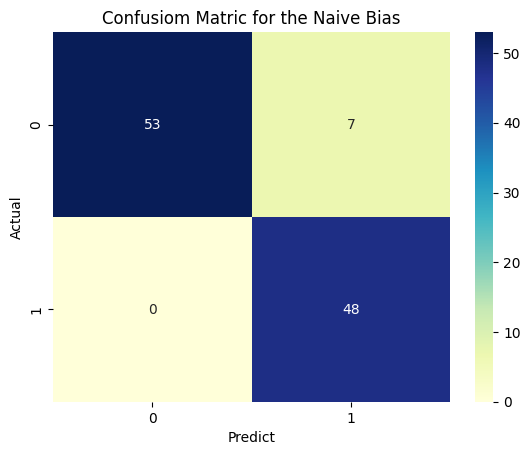

In [ ]:
 #confusion matrix for Naive Bayes
sns.heatmap(cm1,annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusiom Matric for the Naive Bias')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show

In [ ]:
# accuarcy in traning data for naive bias
print("Accuracy of Naive Bayes for training datatse is:", nb_model.score(X_train, y_train))

# Accuracy in testing data for naive bias
print("Accuracy of Naive Bayes for testing datatse is:", nb_model.score(X_test, y_test))

Accuracy of Naive Bayes for training datatse is: 0.848
Accuracy of Naive Bayes for testing datatse is: 0.9351851851851852


The accuracy of your Naive Bayes model on the training data (0.884) and testing data (0.898) are quite close. This generally suggests that there is no significant overfittin









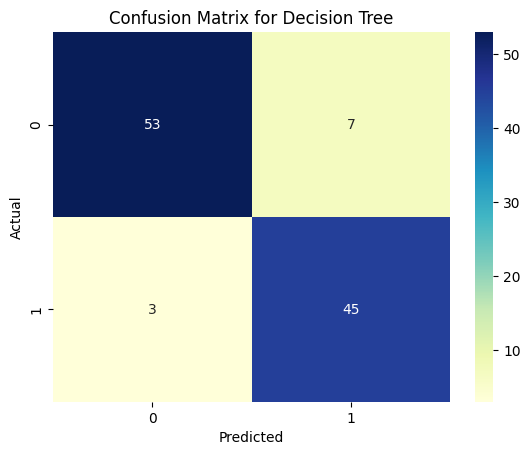

In [ ]:
# confusion matrix for Decision Tree

sns.heatmap(cm2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

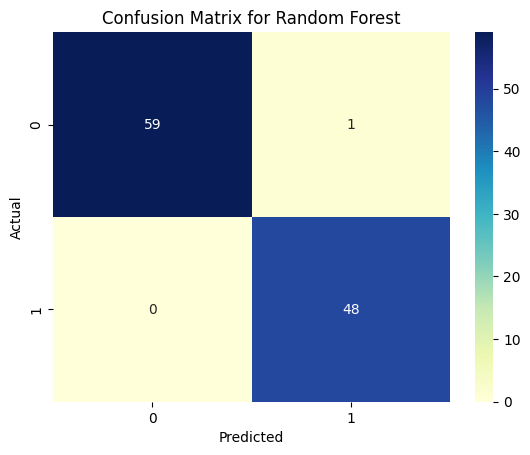

In [ ]:
# confusion matrix for Raqndom Forest
sns.heatmap(cm3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

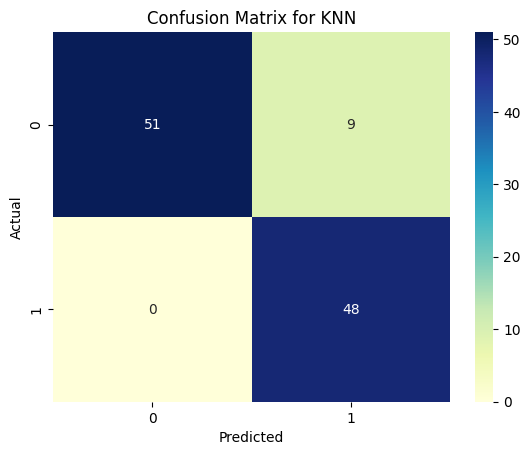

In [ ]:
# confusion matrix for KNN

sns.heatmap(cm4, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Random forest  has the best performance. let's all the measures in a report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           2       0.98      1.00      0.99        48

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



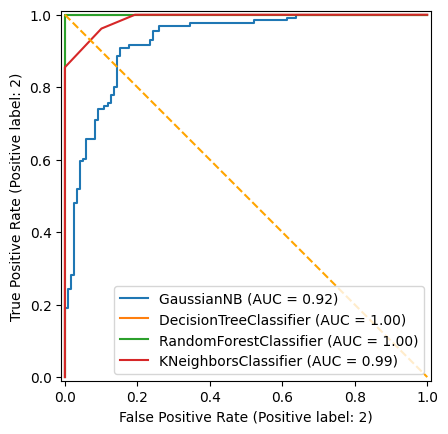

In [ ]:
# plot ROC curve for Xtrain

disp =RocCurveDisplay.from_estimator(nb_model, X_train, y_train)
RocCurveDisplay.from_estimator(dt_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_train, y_train, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_moder, X_train, y_train, ax=disp.ax_)
plt.plot([0,1], [1,0], color='orange', linestyle='--');

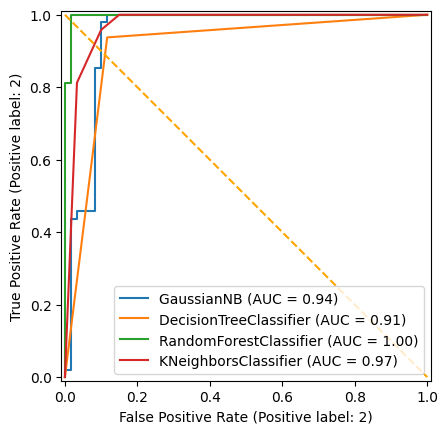

In [ ]:
# plot ROC curve for Xtest

disp =RocCurveDisplay.from_estimator(nb_model, X_test, y_test)
RocCurveDisplay.from_estimator(dt_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn_moder, X_test, y_test, ax=disp.ax_)
plt.plot([0,1], [1,0], color='orange', linestyle='--');

In [ ]:
 #Make a new prediction for new patients (new observations)

# load new observations (new patients)
new_df = pd.read_csv('/content/drive/MyDrive/new.csv')
new_df=new_df.drop(columns=['num'])
new_df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,ca
0,52,0,135,210,1,165,0,1
1,49,1,150,190,0,140,1,2
2,45,0,128,220,0,155,0,0
3,60,1,155,280,1,120,1,3
4,38,0,110,195,0,180,0,0


In [ ]:
# use random forest for new data

y_new_rf=rf_model.predict(new_df)
print(y_new_rf)
print('# This shows that new aptinets have number of heart disease as 0')

[0 0 0 0 0 0]
# This shows that new aptinets have number of heart disease as 0


In [ ]:
# feature importance ritika can do here using random forest

In [ ]:
# find the best value of K in KNN

# create list error[]
error =  []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy = balanced_accuracy_score(y_test, pred_i)
    error.append(1-accuracy)

error;

Text(0, 0.5, 'Error')

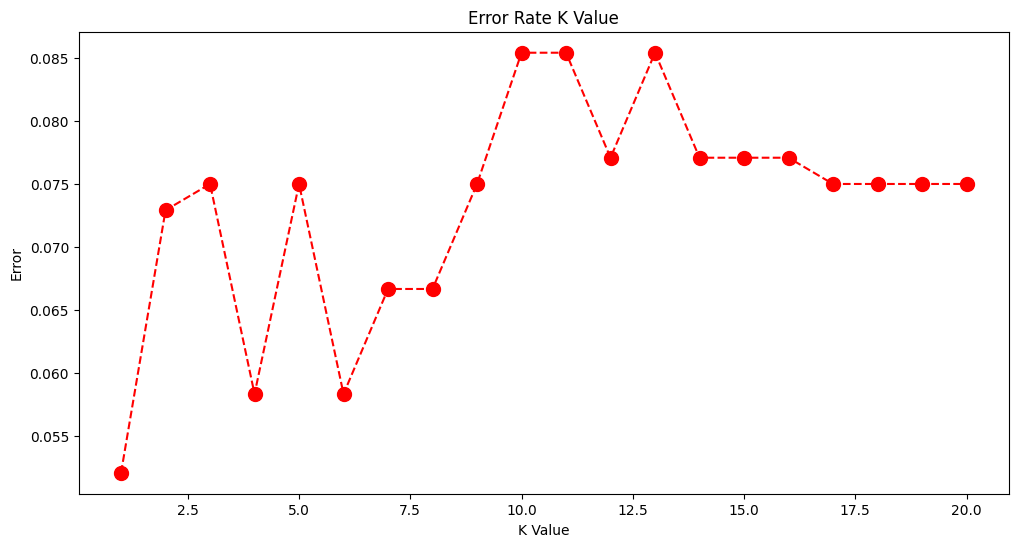

In [ ]:
# plot the knn value

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')

In [ ]:
##coding part for conditional probablity

# Separate features and target variable
X = df1.drop('num', axis=1)  # Assuming 'num' is the target variable (heart disease diagnosis)
y = df1['num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean (or you can use 'median', 'most_frequent', etc.)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features (scaling after imputation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the new balance of the target variable
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", pd.Series(y_train_resampled).value_counts())

Original dataset shape: num
0    105
1     37
2     17
Name: count, dtype: int64
Resampled dataset shape: num
0    105
2    105
1    105
Name: count, dtype: int64


In [ ]:
# Convert resampled data back to a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)  # Use the original feature names
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['num'])    # Create a DataFrame for the target

# Combine the resampled features and target into df2
df2 = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Assuming you used StandardScaler
X_train_original_scale = scaler.inverse_transform(X_train_resampled)

# Convert back to DataFrame with original column names
X_train_original_scale_df = pd.DataFrame(X_train_original_scale, columns=X.columns)

# Combine resampled features and target
df2 = pd.concat([X_train_original_scale_df, pd.DataFrame(y_train_resampled, columns=['num'])], axis=1)

# Check df2 with original scales
df2.head()

,age,sex,trestbps,chol,fbs,thalach,exang,ca,num
0,47.0,1.0,130.0,253.0,0.0,179.0,0.0,0.0,0
1,54.0,1.0,125.0,273.0,0.0,152.0,0.0,1.0,0
2,42.0,1.0,140.0,226.0,0.0,178.0,0.0,0.0,0
3,67.0,0.0,152.0,277.0,0.0,172.0,0.0,1.0,0
4,47.0,1.0,112.0,204.0,0.0,143.0,0.0,0.0,0


num
1    210
0    105
Name: count, dtype: int64


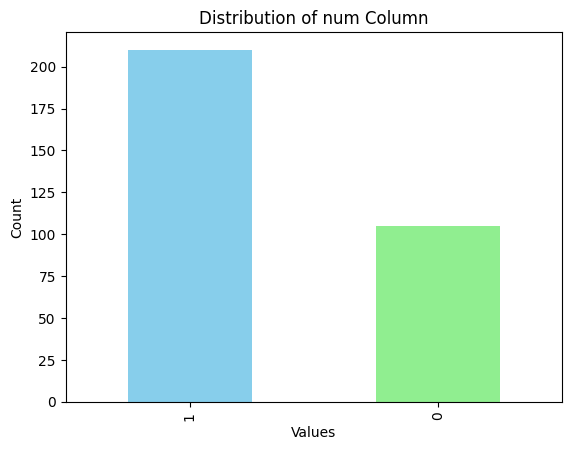

In [ ]:
#convert any instances of 1,2,3,4 to 1 and leave instances of 0 to 0
# Convert 'num' column: 0 stays 0, and any value from 1-4 becomes 1
df2['num'] = df2['num'].apply(lambda x: 1 if x > 0 else 0)

# Check the updated column
print(df2['num'].value_counts())

import matplotlib.pyplot as plt

# Plot the value counts of the 'num' column
df2['num'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])

# Add labels and title
plt.title('Distribution of num Column')
plt.xlabel('Values')
plt.ylabel('Count')

# Show the plot
plt.show()

num
0    210
1    210
Name: count, dtype: int64


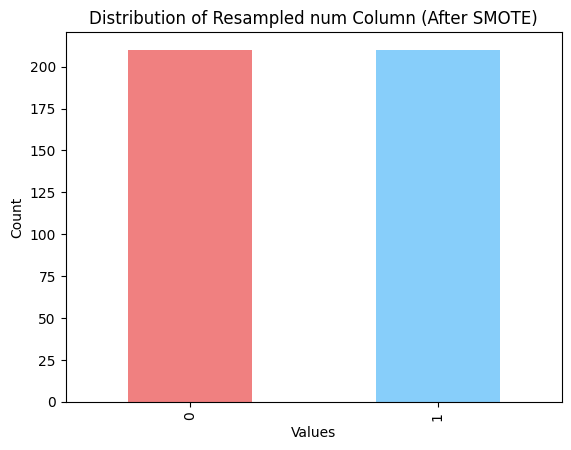

In [ ]:
# Separate features (X) and the updated target variable (y)
X = df2.drop('num', axis=1)  # Features
y = df2['num']  # Target

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['num'] = y_resampled  # Add the resampled target back

# Check the new balance of the target variable
print(df_resampled['num'].value_counts())

import matplotlib.pyplot as plt

# Plot the value counts of the resampled 'num' column
df_resampled['num'].value_counts().plot(kind='bar', color=['lightcoral', 'lightskyblue'])

# Add labels and title
plt.title('Distribution of Resampled num Column (After SMOTE)')
plt.xlabel('Values')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
# Overwrite df2 with the resampled data
df2 = pd.DataFrame(X_resampled, columns=X.columns)
df2['num'] = y_resampled  # Add the resampled 'num' column back

# Check the updated df2
print(df2['num'].value_counts())

num
0    210
1    210
Name: count, dtype: int64


In [ ]:
# Numerator: Count where num = 1 AND fbs = 1
numerator = ((df2['num'] == 1) & (df2['fbs'] == 1.0)).sum()
numerator

0

In [ ]:
# Denominator: Count where fbs > 120 mg/dl
denominator = (df2['sex'] == 1.0).sum()
denominator

275

In [ ]:
probability = numerator / denominator
print(f"P(heart disease = 1 | fast blood sugar = 1) = {probability}")

P(heart disease = 1 | fast blood sugar = 1) = 0.0


### **Calculate P(heart disease = 1 | fast blood sugar = 1.0)**

In [ ]:
# Numerator: Count where num = 1 AND fbs = 1
numerator = ((df2['num'] == 1) & (df2['fbs'] == 1.0)).sum()
numerator

0

In [ ]:
# Denominator: Count where fbs > 120 mg/dl
denominator = (df2['sex'] == 1.0).sum()
denominator

275

In [ ]:
robability = numerator / denominator
print(f"P(heart disease = 1 | fast blood sugar = 1) = {probability}")

P(heart disease = 1 | fast blood sugar = 1) = 0.0


In [ ]:
numerator = ((df2['num'] == 1) & (df2['sex'] == 1)).sum()
numerator

174

In [ ]:
denominator = (df2['sex'] == 1).sum()
denominator

275

In [ ]:
probability = numerator / denominator
probability_percentage = probability * 100

In [ ]:
print(f"P(heart disease = 1 | sex = 1) = {probability_percentage}")

P(heart disease = 1 | sex = 1) = 63.272727272727266


### **Calculate P(heart disease = 1 | sex = 1)**

In this instance, when sex is equal to 1, it indicates the sex is male

---



In [ ]:
numerator = ((df2['num'] == 1) & (df2['sex'] == 0)).sum()
numerator

20

In [ ]:
denominator = (df2['sex'] == 0).sum()
denominator

81

In [ ]:
probability = numerator / denominator
probability_percentage = probability * 100
print(f"P(heart disease = 1 | sex = 0) = {probability_percentage}")

P(heart disease = 1 | sex = 0) = 24.691358024691358


### **Calculate P(heart disease = 1 | resting blood pressure > 130)**

In [ ]:
numerator = ((df2['num'] == 1) & (df2['trestbps'] > 130)).sum()
numerator

121

In [ ]:
denominator = (df2['trestbps'] > 130).sum()
denominator

193

In [ ]:
probability_percentage = probability * 100
print(f"P(heart disease = 1 | resting blood pressure > 130) = {probability_percentage:.2f}%")

P(heart disease = 1 | resting blood pressure > 130) = 24.69%


#**Feature importance using Naïve Bayes**

### Blood Pressure

In [ ]:
#Threshold for resting blood pressure
threshold = 130

In [ ]:
# Calculate the numerator and denominator for P(heart disease = 1 | trestbps > 130)
numerator_above_threshold = ((df2['num'] == 1) & (df2['trestbps'] > threshold)).sum()
denominator_above_threshold = (df2['trestbps'] > threshold).sum()

In [ ]:
# Calculate the conditional probability
if denominator_above_threshold != 0:
    probability_above = numerator_above_threshold / denominator_above_threshold
else:
    probability_above = 0

In [ ]:
# Calculate the numerator and denominator for P(heart disease = 1 | trestbps <= 130)
numerator_below_threshold = ((df2['num'] == 1) & (df2['trestbps'] <= threshold)).sum()
denominator_below_threshold = (df2['trestbps'] <= threshold).sum()

In [ ]:
if denominator_below_threshold != 0:
    probability_below = numerator_below_threshold / denominator_below_threshold
else:
    probability_below = 0

In [ ]:
# Print results as percentages
print(f"P(heart disease = 1 | trestbps > {threshold}) = {probability_above * 100:.2f}%")
print(f"P(heart disease = 1 | trestbps <= {threshold}) = {probability_below * 100:.2f}%")

P(heart disease = 1 | trestbps > 130) = 62.69%
P(heart disease = 1 | trestbps <= 130) = 39.21%


### Cholesterol

In [ ]:
threshold_chol = 200
numerator_chol_high = ((df2['num'] == 1) & (df2['chol'] > threshold_chol)).sum()
denominator_chol_high = (df2['chol'] > threshold_chol).sum()

if denominator_chol_high != 0:
    probability_chol_high = numerator_chol_high / denominator_chol_high
else:
    probability_chol_high = 0

numerator_chol_low = ((df2['num'] == 1) & (df2['chol'] <= threshold_chol)).sum()
denominator_chol_low = (df2['chol'] <= threshold_chol).sum()

if denominator_chol_low != 0:
    probability_chol_low = numerator_chol_low / denominator_chol_low
else:
    probability_chol_low = 0

print(f"P(heart disease = 1 | chol > {threshold_chol}) = {probability_chol_high * 100:.2f}%")
print(f"P(heart disease = 1 | chol <= {threshold_chol}) = {probability_chol_low * 100:.2f}%")

P(heart disease = 1 | chol > 200) = 51.97%
P(heart disease = 1 | chol <= 200) = 39.06%


#**Feature importance using Random Forest**

In [ ]:
X = df2.drop('num', axis=1)  # Drop the target variable 'num'
y = df2['num']  # Target variable

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
palette = sns.color_palette("husl", len(feature_importance_df))  # "husl" gives a range of colors

<ipython-input-576-47d760567c99>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

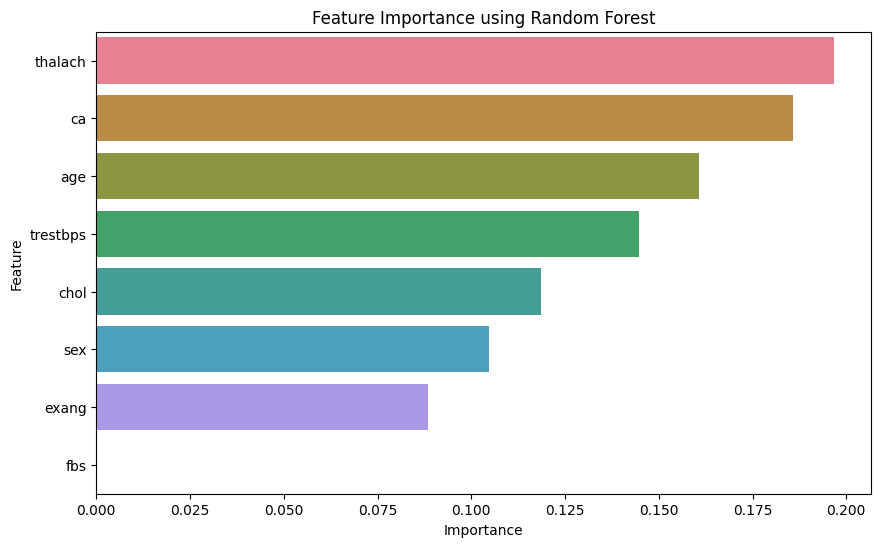

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=palette)
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# DATA Visuialization part starts here
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca',
       'num'],
      dtype='object')

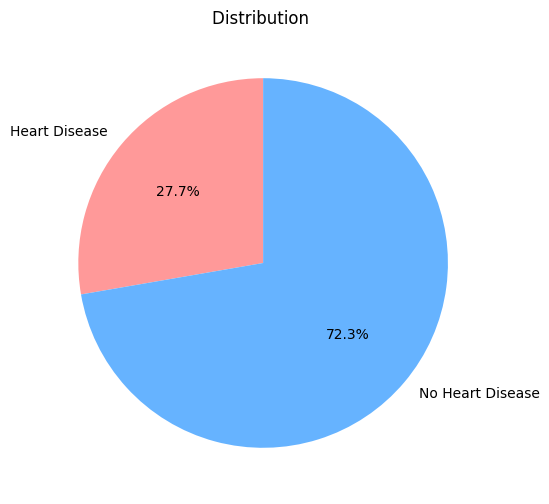

In [ ]:
# Subsetting the DataFrame to include specific columns
# subset_df1 = heart_disease[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca', 'num']]

# Plotting the Pie Chart for 'sex'
# plt.figure(figsize=(6, 6))
# sex_counts = subset_df1['sex'].value_counts()  # Get the value counts for the 'sex' column
# plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# plt.title('Pie Chart of Sex')
# plt.show()

sums = df1['num'].sum()

# plt.figure(figsize=(8, 6))
# plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
# plt.title('Percentage Distribution of people having Disease')
# plt.show()

plt.figure(figsize=(8, 6))
plt.pie([sums,303-sums], labels=['Heart Disease','No Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution ')
plt.show()

# Set title



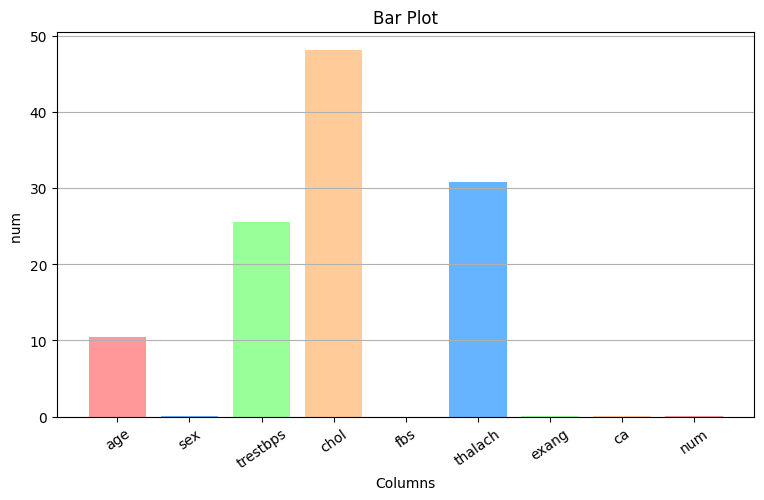

In [ ]:
# Subsetting the DataFrame to include specific columns
# subset_df1 = heart_disease[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca', 'num']]

# Plotting the bar graph for 'sex'
# plt.figure(figsize=(9, 5))
# sex_counts = subset_df1['sex'].value_counts()  # Get the value counts for the 'sex' column
# plt.bar graph(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# plt.title('Bar graph of Sex')
# plt.show()
sums = df1.sum()

# Scaling down the values to a single-digit range (dividing by a large number like 1000)
scaled_sums = sums / 1000  # Adjust the divisor based on your needs

#Plotting the Bar Graph for the scaled sums
plt.figure(figsize=(9, 5))
plt.bar(scaled_sums.index, scaled_sums.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.xlabel('Columns')
plt.ylabel('num ')  # Label indicates scaled values
plt.title('Bar Plot')
plt.xticks(rotation=35)  # Rotate x labels for better readability
plt.grid(axis='y')  # Add grid for better visual clarity
plt.show()

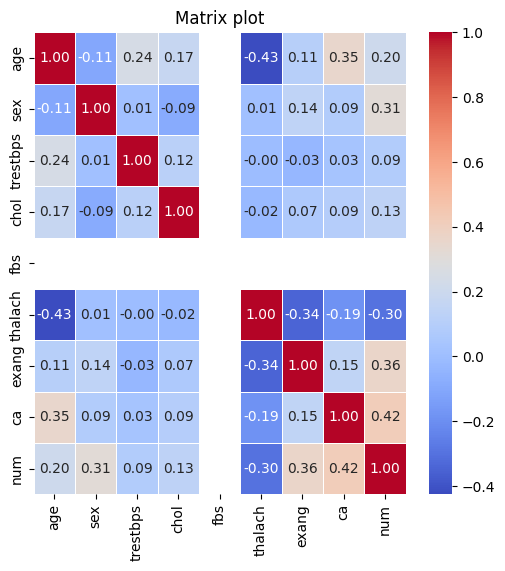

In [ ]:
# Subsetting the DataFrame to include specific columns
# subset_df1 = heart_disease[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca', 'num']]

# Plotting the matrix graph for 'sex'
# plt.figure(figsize=(6, 6))
# sex_counts = subset_df1['sex'].value_counts()  # Get the value counts for the 'sex' column
# plt.matrix graph(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# plt.title('Matrix plot')
# plt.show()

# sums = df1['num'].sum()
plt.figure(figsize=(6, 6))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrix plot')
plt.show()

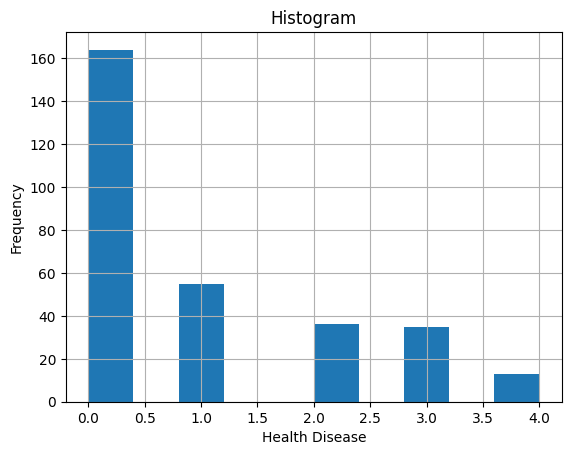

In [ ]:
# Subsetting the DataFrame to include specific columns
#subset_df1 = heart_disease[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca', 'num']]

# Plotting the histogram for 'sex'
# plt.figure(figsize=(6, 6))
# sex_counts = subset_df1['sex'].value_counts()  # Get the value counts for the 'sex' column
# plt.matrix graph(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
# plt.title('Histrogram')
# plt.show()


# Plotting Histogram for each column in the subset
# sns.histplot(figsize=(12, 10), bins=15, color='#66b3ff', edgecolor='black')

# # Adjust the title for the overall plot
# plt.suptitle('Histogram', fontsize=16)

# # Show the plot
# plt.show()


df_int = df[df['num'] == df['num'].astype(int)]
df_int['num'].hist()
plt.xlabel('Health Disease')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

## ***Regression Analysis***

In [ ]:
##daniel can start logistics refression here

# Logistic Regression
def make_box(df, x_var):
    fig = px.box(df,
                 x=x_var
                )
    fig.show()

In [ ]:
def make_scatter(df, x_var, y_var):
    fig = px.scatter(df,
                 x=x_var,
                 y=y_var,
                 trendline="ols"
                )
    fig.show()

In [ ]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method."""

    # Calculate quantiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

In [ ]:
def replace_nulls_median(df, column):
    """Replaces null values in a DataFrame column with the median value."""

    # Calculate median
    median = df[column].median()

    # Replace null values
    df[column] = df[column].fillna(median)

    return df

In [ ]:
# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X_temp = auto_mpg.data.features
y_temp = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [ ]:
df = pd.concat([X_temp, y_temp], axis=1)
df


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


### ***Data Processing***

In [ ]:
print(df.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [ ]:
# Replace null values with median value of column

df = df.copy()
for column in df.columns:
    df = replace_nulls_median(df, column)

print(df.isnull().sum())

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


In [ ]:
# Using box plots to identify outliers in each feature of df

make_box(df, 'displacement')

In [ ]:
make_box(df, 'cylinders')

In [ ]:
make_box(df, 'horsepower')

In [ ]:
make_box(df, 'weight')

In [ ]:
make_box(df, 'acceleration')

In [ ]:
make_box(df, 'model_year')

In [ ]:
make_box(df, 'origin')

In [ ]:
make_box(df, 'mpg')

In [ ]:
# First pass of custom function to remove outliers of each feature

df_clean = df.copy()
for column in df_clean.columns:
    df_clean = remove_outliers_iqr(df_clean, column)

In [ ]:
# Second pass of custom function to remove additional outliers

df_final = df_clean.copy()
for column in df_final.columns:
    df_final = remove_outliers_iqr(df_final, column)

In [ ]:
make_box(df_final, 'displacement')

In [ ]:
make_box(df_final, 'cylinders')

In [ ]:
# Removing additional outliers from Horsepower causes more outliers to appear, so after two rounds of removing outliers it was decided to keep and proceed with the 3 outliers shown

make_box(df_final, 'horsepower')

In [ ]:
make_box(df_final, 'weight')

In [ ]:
make_box(df_final, 'acceleration')

In [ ]:
make_box(df_final, 'model_year')

In [ ]:
make_box(df_final, 'origin')

In [ ]:
make_box(df_final, 'mpg')

# Data Analysis (Descriptive Statistics and Regression Analysis)

In [ ]:
df_final.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,179.519178,5.279452,97.920548,2871.791781,15.781370,76.290411,1.608219,24.130411
std,91.565638,1.611681,29.141244,776.441312,2.406044,3.597625,0.817016,7.341417
min,68.000000,3.000000,46.000000,1613.000000,9.500000,70.000000,1.000000,11.000000
25%,98.000000,4.000000,75.000000,2205.000000,14.000000,73.000000,1.000000,18.000000
50%,140.000000,4.000000,90.000000,2720.000000,15.500000,76.000000,1.000000,23.800000
75%,250.000000,6.000000,110.000000,3425.000000,17.300000,79.000000,2.000000,29.800000
max,400.000000,8.000000,170.000000,4997.000000,22.200000,82.000000,3.000000,44.600000


In [ ]:
X = df_final.drop('mpg', axis=1)
y = df_final['mpg']

Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.3, random_state=0)

# Initial regression results summary

import statsmodels.api as sm

X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     233.6
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          4.25e-129
Time:                        19:49:06   Log-Likelihood:                -931.29
No. Observations:                 365   AIC:                             1879.
Df Residuals:                     357   BIC:                             1910.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.0740      4.589     -2.631      0.009     -21.099      -3.049
displacement     0.0070      0.009      0.807      0.420      -0.010       0.024
cylinders        0.2566      0.355      0.723      0.470      -0.441       0.954
horsepower      -0.0537      0.018     -3.046      0.002      -0.088      -0.019
weight          -0.0060      0.001     -7.886      0.000      -0.008      -0.005
acceleration    -0.1322      0.110     -1.199      0.232      -0.349       0.085
model_year       0.7387      0.049     15.136      0.000       0.643       0.835
origin           1.1485      0.265      4.330      0.000       0.627       1.670
==============================================================================
Omnibus:                       16.899   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.658
Skew:                           0.368   Prob(JB):                     7.29e-06
Kurtosis:                       4.007   Cond. No.                     8.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Final multivariate regression results
# Displacement, cylinders, and acceleration columns had P>0.05 so I dropped those column and reouput the regression training, testing, and summary

X_new = X.drop(['displacement','cylinders', 'acceleration'], axis=1, inplace=False)

Xtrain, Xtest, ytrain, ytest = train_test_split (X_new, y, test_size=0.3, random_state=0)

X_new = sm.add_constant(X_new)

reg = sm.OLS(y, X_new).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     402.5
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.01e-131
Time:                        19:49:06   Log-Likelihood:                -934.86
No. Observations:                 365   AIC:                             1880.
Df Residuals:                     360   BIC:                             1899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4230      3.936     -3.664      0.000     -22.164      -6.682
horsepower    -0.0281      0.012     -2.376      0.018      -0.051      -0.005
weight        -0.0056      0.000    -11.816      0.000      -0.007      -0.005
model_year     0.7305      0.048     15.097      0.000       0.635       0.826
origin         0.9883      0.248      3.983      0.000       0.500       1.476
==============================================================================
Omnibus:                       18.140   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.548
Skew:                           0.389   Prob(JB):                     2.83e-06
Kurtosis:                       4.037   Cond. No.                     7.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression equation of final multivariate regression model

y = -0.028(x1) - 0.006(x2) + -.73(x3) + 0.988(x4) - 14.423

# Interpretation of Model

Based on the R-squared value of 0.817 and the Adjusted R-squared value of 0.815, this model can performs well and consistently when predicting MPG. I would This level of permormance is realistic. The equation shows that horsepower and weight have a negative relationship with MPS, so as they increase, MPG will likewise decrease. Model Year and Origin on the other hand have a positive relationship with MPG, so as they increase, MPG also increases.


In [ ]:
X_new.describe()

,const,horsepower,weight,model_year,origin
count,365.0,365.000000,365.000000,365.000000,365.000000
mean,1.0,97.920548,2871.791781,76.290411,1.608219
std,0.0,29.141244,776.441312,3.597625,0.817016
min,1.0,46.000000,1613.000000,70.000000,1.000000
25%,1.0,75.000000,2205.000000,73.000000,1.000000
50%,1.0,90.000000,2720.000000,76.000000,1.000000
75%,1.0,110.000000,3425.000000,79.000000,2.000000
max,1.0,170.000000,4997.000000,82.000000,3.000000


In [ ]:
df_remerged = pd.concat([X_new, y], axis=1)
df_remerged

,const,horsepower,weight,model_year,origin,mpg
0,1.0,130.0,3504,70,1,18.0
1,1.0,165.0,3693,70,1,15.0
2,1.0,150.0,3436,70,1,18.0
3,1.0,150.0,3433,70,1,16.0
4,1.0,140.0,3449,70,1,17.0
...,...,...,...,...,...,...
392,1.0,90.0,2950,82,1,27.0
393,1.0,86.0,2790,82,1,27.0
395,1.0,84.0,2295,82,1,32.0
396,1.0,79.0,2625,82,1,28.0


In [ ]:
make_scatter(df_remerged, 'horsepower', 'mpg')

In [ ]:
make_scatter(df_remerged, 'weight', 'mpg')

In [ ]:
make_scatter(df_remerged, 'model_year', 'mpg')

In [ ]:
make_scatter(df_remerged, 'origin', 'mpg')

# Heatmaps That Show the Correlation Between Features

In [ ]:
df_final.corr()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
displacement,1.000000,0.955180,0.869327,0.934179,-0.417546,-0.260949,-0.608947,-0.792209
cylinders,0.955180,1.000000,0.845245,0.885029,-0.412891,-0.256152,-0.536274,-0.746392
horsepower,0.869327,0.845245,1.000000,0.866332,-0.621999,-0.291539,-0.440131,-0.775202
weight,0.934179,0.885029,0.866332,1.000000,-0.311824,-0.201852,-0.567678,-0.821096
acceleration,-0.417546,-0.412891,-0.621999,-0.311824,1.000000,0.183025,0.131978,0.310830
model_year,-0.260949,-0.256152,-0.291539,-0.201852,0.183025,1.000000,0.124804,0.523243
origin,-0.608947,-0.536274,-0.440131,-0.567678,0.131978,0.124804,1.000000,0.538567
mpg,-0.792209,-0.746392,-0.775202,-0.821096,0.310830,0.523243,0.538567,1.000000


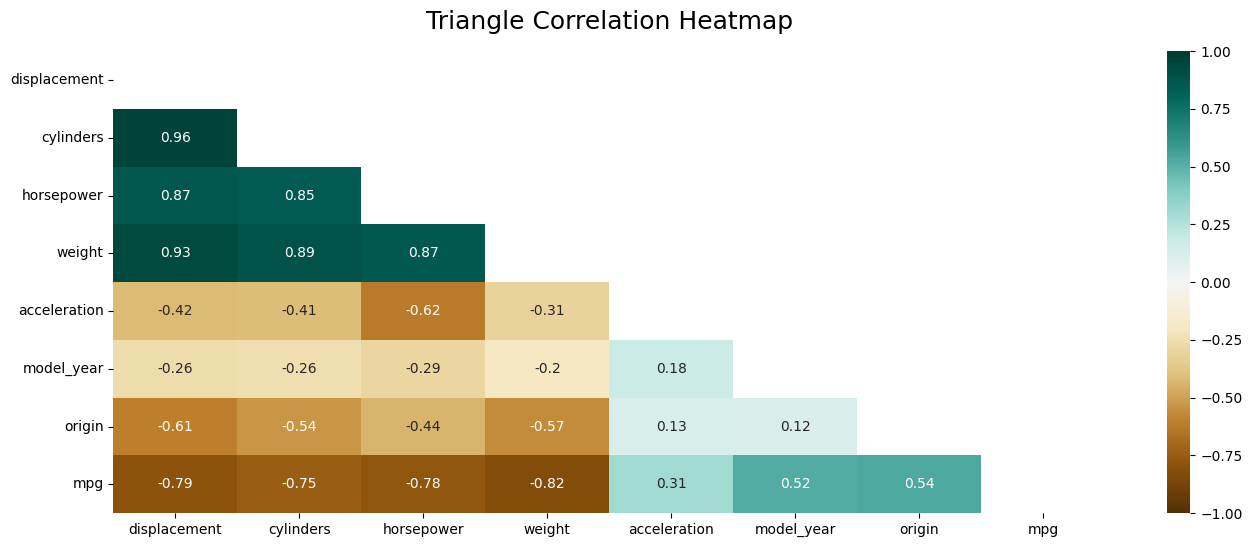

In [ ]:
# Triangle heatmap that shows correlation between all features

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))
heatmap = sns.heatmap(df_final.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

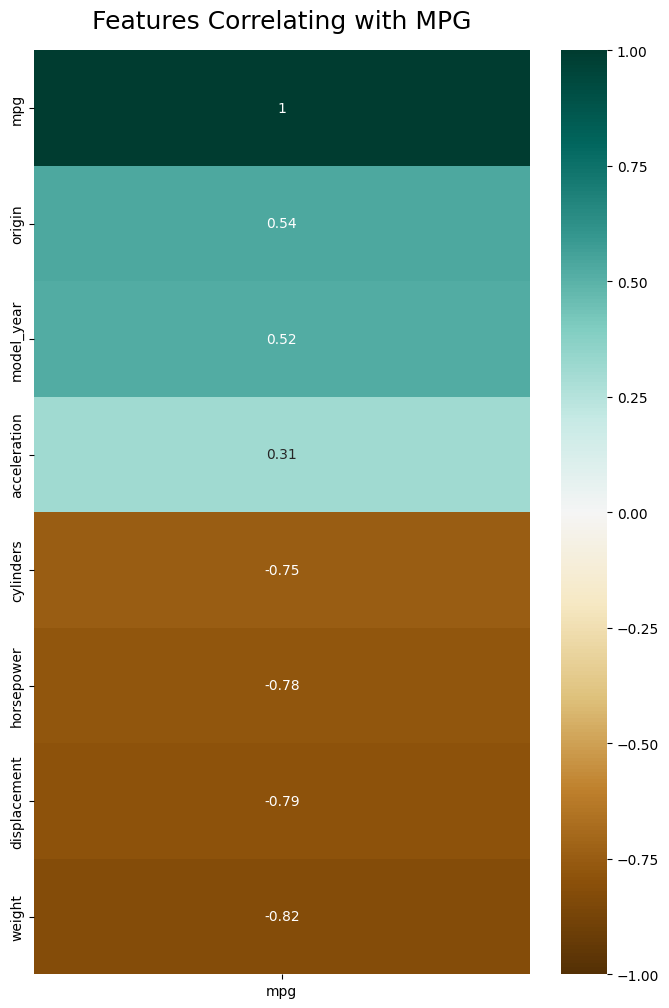

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_final.corr()[['mpg']].sort_values(by='mpg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with MPG', fontdict={'fontsize':18}, pad=16);

In [ ]:
X_hp = X_new['horsepower']
X_w = X_new['weight']
X_my = X_new['model_year']

X_w = sm.add_constant(X_w)

reg = sm.OLS(y, X_w).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     751.2
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           2.03e-90
Time:                        19:49:08   Log-Likelihood:                -1040.4
No. Observations:                 365   AIC:                             2085.
Df Residuals:                     363   BIC:                             2093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.4259      0.843     55.098      0.000      44.769      48.083
weight        -0.0078      0.000    -27.408      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       23.917   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.986
Skew:                           0.578   Prob(JB):                     8.37e-07
Kurtosis:                       3.710   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression Model Equation for Weight

y = -0.008(x) + 46.426

# Interpretation of Model

Based on the R-squared value of 0.674 and the Adjusted R-squared value of 0.673, this model does a reasonable but imperfect job of predicting MPG. It is the independent feature that best predicts MPG, but it still performs worse the multivariate model.

In [ ]:
res= stat()
res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(X_w)), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),4.1847
1,Mean Squared Error (MSE),17.5114
2,Mean Absolute Error (MAE),3.2207
3,Mean Absolute Percentage Error (MAPE),0.1367


In [ ]:
X_my = sm.add_constant(X_my)

reg = sm.OLS(y, X_my).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           4.82e-27
Time:                        19:49:08   Log-Likelihood:                -1186.7
No. Observations:                 365   AIC:                             2377.
Df Residuals:                     363   BIC:                             2385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.3283      6.971     -8.224      0.000     -71.037     -43.620
model_year     1.0677      0.091     11.698      0.000       0.888       1.247
==============================================================================
Omnibus:                       27.189   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.068
Skew:                           0.265   Prob(JB):                      0.00145
Kurtosis:                       2.239   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression Model Equation for Model Year

y = 0.091(x) + 57.328

# Interpretation of Model

An R-squared value of 0.274 and an Adjusted R-squared value of 0.272 indicates that model year on its own is not a very good feature to use to predict MPG.

In [ ]:
res= stat()

res.reg_metric(y=np.array(y), yhat=np.array(reg.predict(sm.add_constant(X_my))), resid=np.array(reg.resid))
res.reg_metric_df

,Metrics,Value
0,Root Mean Square Error (RMSE),6.2477
1,Mean Squared Error (MSE),39.0332
2,Mean Absolute Error (MAE),5.3070
3,Mean Absolute Percentage Error (MAPE),0.2432


# Visualizing Feature Relationships with Line Charts

In [ ]:
fig = px.line(df_remerged.groupby('model_year')['mpg'].mean().reset_index(),
             x='model_year',
             y='mpg',
             title = 'Average MPG by Model Year'
            )
fig.show()

In [ ]:
fig = px.line(X_new.groupby('model_year')['horsepower'].mean().reset_index(),
             x='model_year',
             y='horsepower',
             title='Average Horsepower by Model Year'
             )
fig.show()

In [ ]:
fig = px.line(df_remerged.groupby('model_year')['weight'].mean().reset_index(),
             x='model_year',
             y='weight',
             title = 'Average Weight by Model Year'
            )
fig.show()